## Bike Sharing Assignment

### Contents

### 1. Problem Statement & Business Goal


### 2. Importing Required Libraries

In [1]:
# Importing Required Libraries

import numpy as np, pandas as pd, seaborn as sns, sklearn as sk, statsmodels as sm, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file

day = pd.read_csv('day.csv')

### 3. Data Review & Understanding

In [3]:
# Review Data Frame
# Fixing Rows and Columns
# Fixing Missing Values
# Standardizing Values
# Fixing Invalid Values
# Filtering Data
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
day.shape

(730, 16)

In [5]:
# Total rides completed
day[['cnt','registered','casual']].sum()

cnt           3290845
registered    2670893
casual         619952
dtype: int64

In [6]:
# Checking for null values and data types in the dataset
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
day.hum.value_counts(bins=7)

(55.571, 69.464]     245
(41.679, 55.571]     198
(69.464, 83.357]     182
(83.357, 97.25]       60
(27.786, 41.679]      41
(13.893, 27.786]       3
(-0.0982, 13.893]      1
Name: count, dtype: int64

In [9]:
# Checking unique values per variable
day.apply(lambda x:len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
# Checking once again for any null values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#Observations: No null values to fix

### 4. Data Preprocessing 

In [12]:
# Dropping columns which are definitely not required based on initial review
day.drop(columns= ['instant','dteday'],axis=1,inplace=True)

In [13]:
# Converting the data type of categorical variables to category data type
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    day[col] = day[col].astype('category')

In [14]:
# Labeling some variables for better readability
day.rename(columns={"yr":"year","cnt":"count","mnth":"month","weathersit":"weather","hum":"humidity"}, inplace =True)

In [15]:
day.head()

season year month holiday weekday workingday weather       temp     atemp  \
0      1    0     1       0       6          0       2  14.110847  18.18125   
1      1    0     1       0       0          0       2  14.902598  17.68695   
2      1    0     1       0       1          1       1   8.050924   9.47025   
3      1    0     1       0       2          1       1   8.200000  10.60610   
4      1    0     1       0       3          1       1   9.305237  11.46350   

   humidity  windspeed  casual  registered  count  
0   80.5833  10.749882     331         654    985  
1   69.6087  16.652113     131         670    801  
2   43.7273  16.636703     120        1229   1349  
3   59.0435  10.739832     108        1454   1562  
4   43.6957  12.522300      82        1518   1600

### 5. Exploratory Data Analysis

#### 5A Univariate Analysis: Numeric Variables

In [16]:
# Function for numerical univariate analysis
def univariate_num(col,day):
    sns.set(font_scale=2)
    fig, axes = plt.subplots(1, 2,figsize=(30,10),dpi=50)
    sns.boxplot(ax=axes[0], x=day[col])
    axes[0].set_title(col+" distribution")

    sns.histplot(ax=axes[1], x=day[col],kde=True,bins=50)
    axes[1].set_title(col+" distribution and density")


    locs, labels = plt.xticks()
    plt.show()

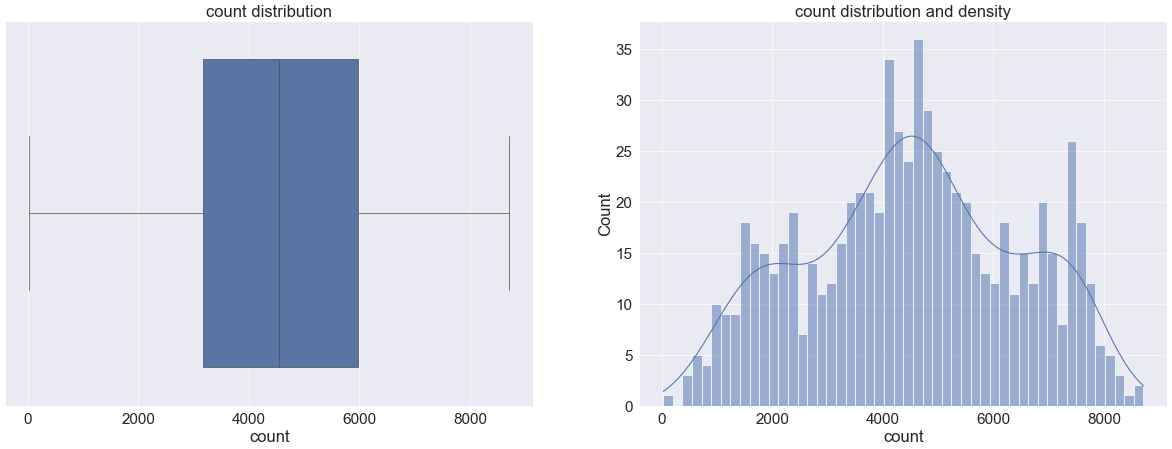

In [17]:
univariate_num('count',day)

In [18]:
# The median count appears to be around 4500 and seems to be broadly following a normal distribution

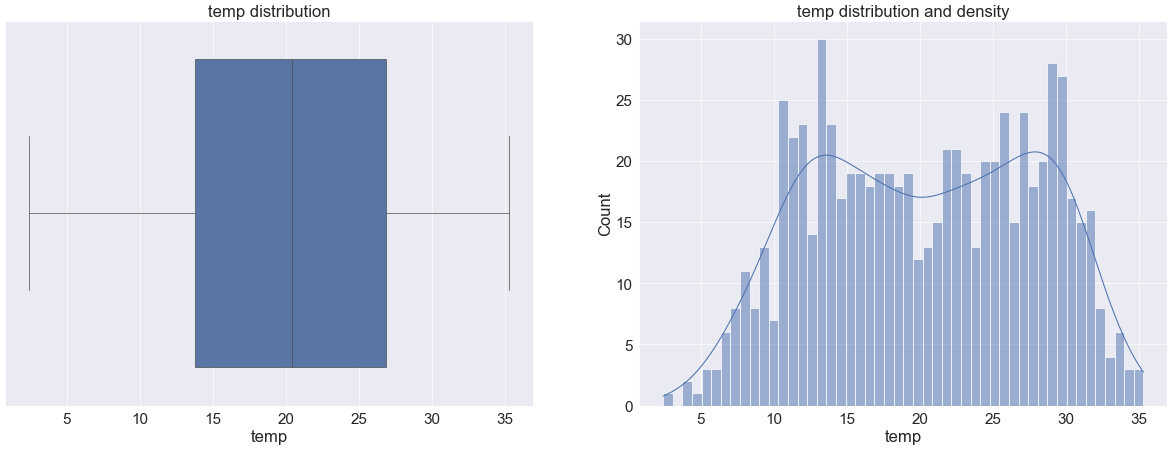

In [19]:
univariate_num('temp',day)

In [20]:
# The median count appears to be close to 20. The distribution appears to be bimodal. However

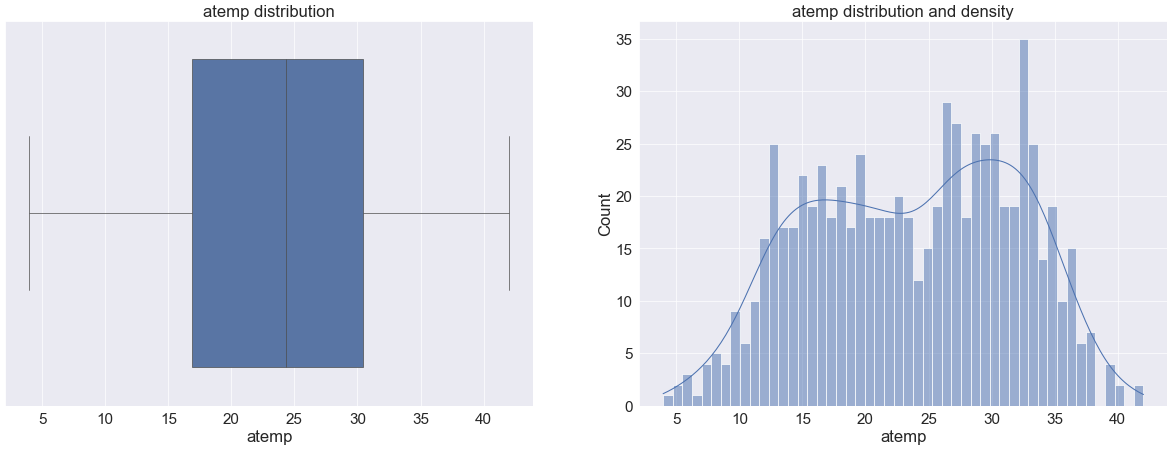

In [21]:
univariate_num('atemp',day)

In [22]:
# Both atemp and temp closely mimic each others distribution

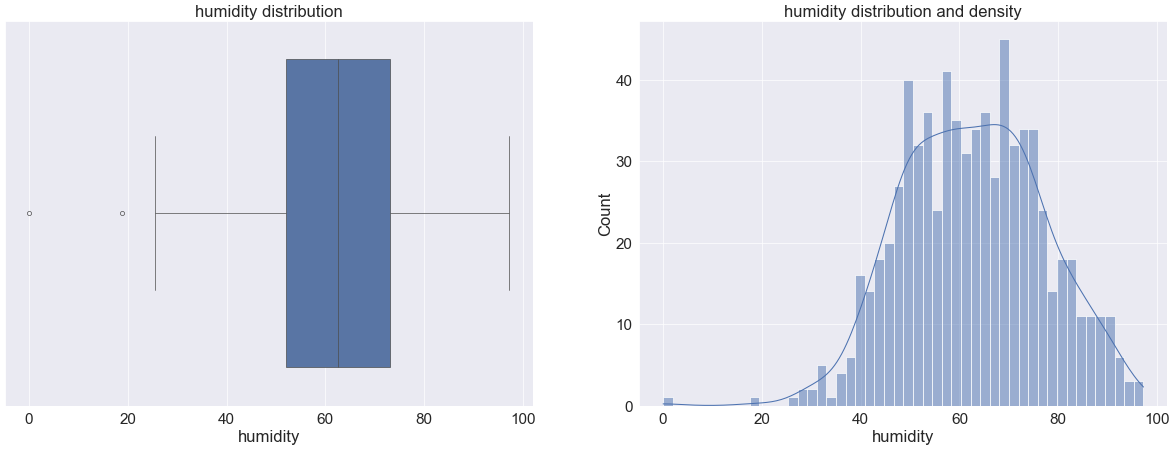

In [23]:
univariate_num('humidity',day)

In [24]:
# Humidity has minor outliers however this does not impact the observations

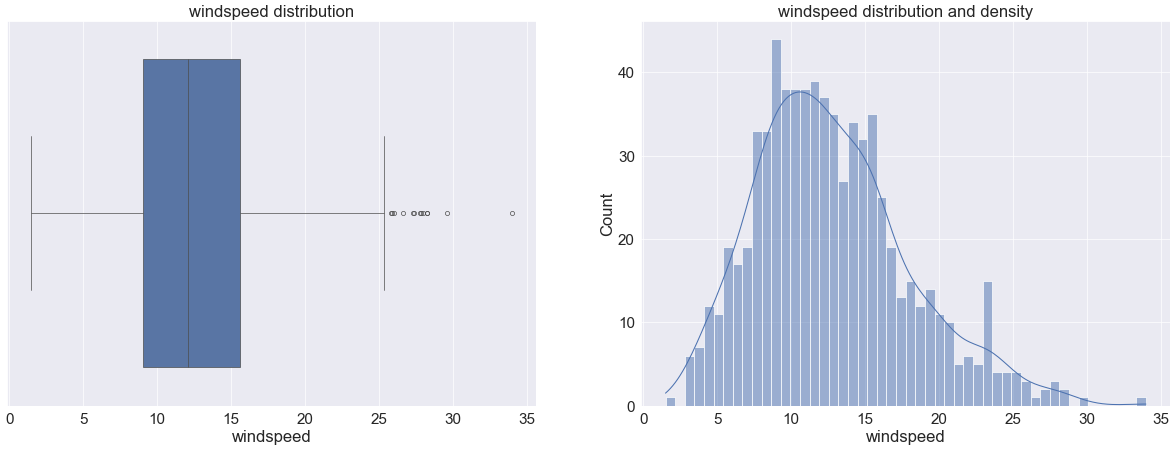

In [25]:
univariate_num('windspeed',day)

In [26]:
# There are some outliers for windspeed. This is slightly rightright skewed.

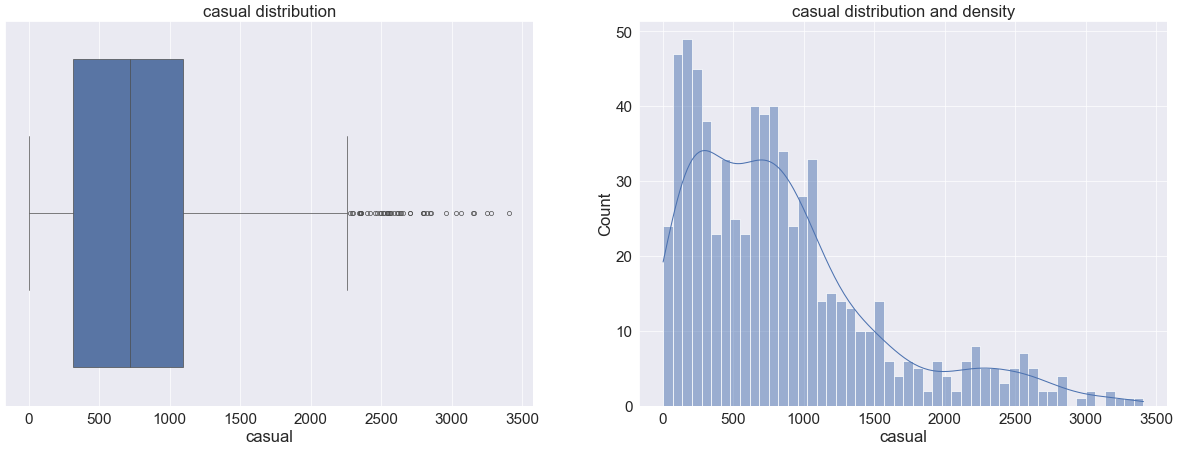

In [27]:
univariate_num('casual',day)

In [28]:
# There are some outliers for casual. This is right skewed.

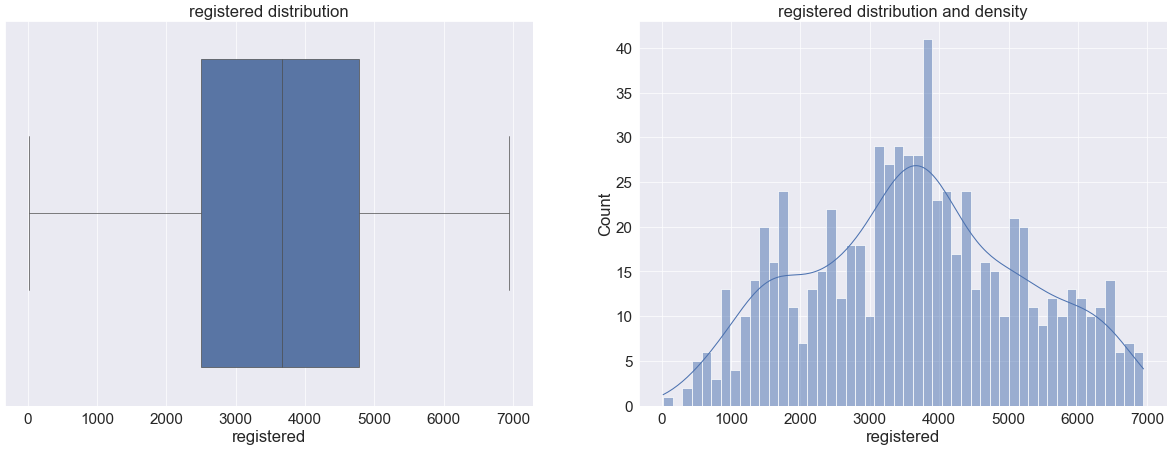

In [29]:
univariate_num('registered',day)

In [30]:
# The registered users count follows broadly a normal distribution.

#### 5B Univariate Analysis: Categorical Variables

In [31]:
# Building a function to generate Univariate Categorical Analysis
def univariate_cat(col,day):
    sns.set(font_scale=1)
    plt.figure(figsize=[10,4])
    ax=sns.countplot(x=day[col], data=day)
    plt.title(col+ ' distribution')
    #add_value_labels(ax)
    plt.xticks(rotation=90)
    plt.show()


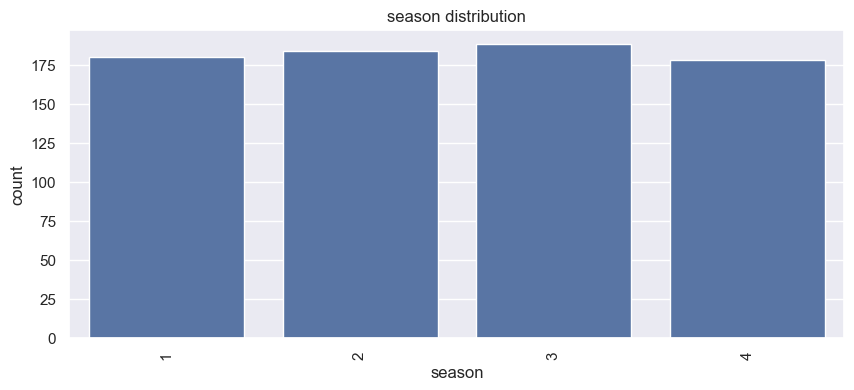

In [32]:
univariate_cat('season',day)

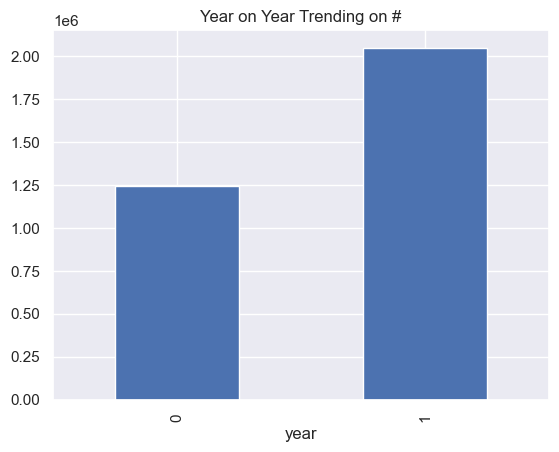

In [33]:
day.groupby('year')['count'].sum().plot.bar();
plt.title('Year on Year Trending on #');

In [34]:
day.groupby('year')['count'].sum()


year
0    1243103
1    2047742
Name: count, dtype: int64

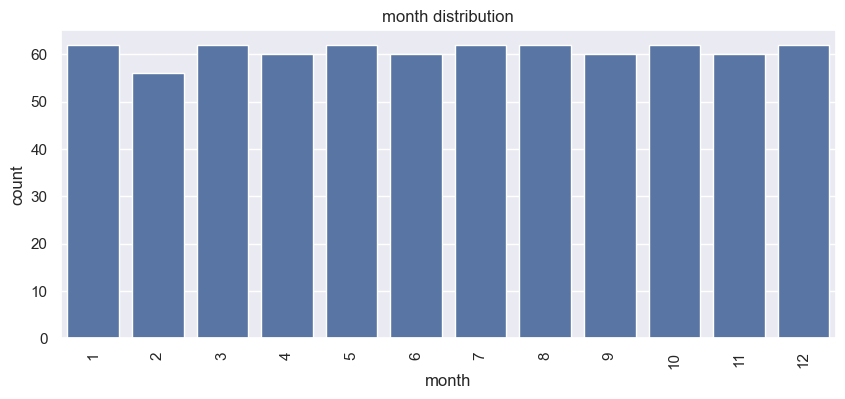

In [35]:
univariate_cat('month',day)

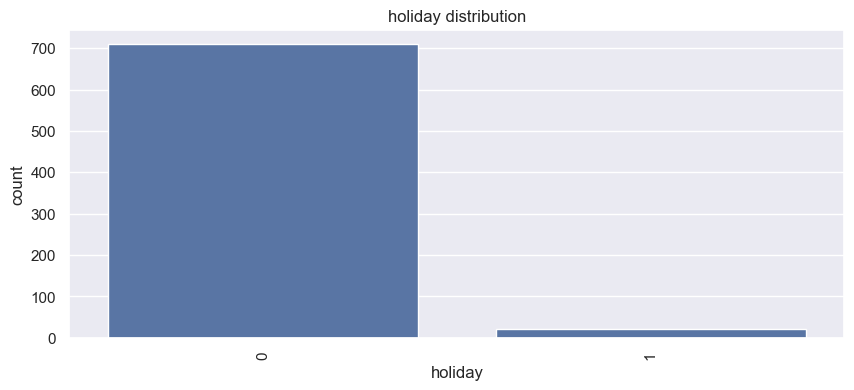

In [36]:
univariate_cat('holiday',day)

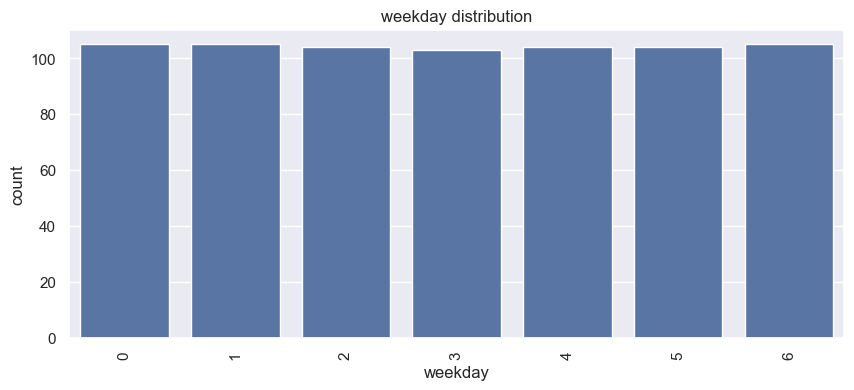

In [37]:
univariate_cat('weekday',day)

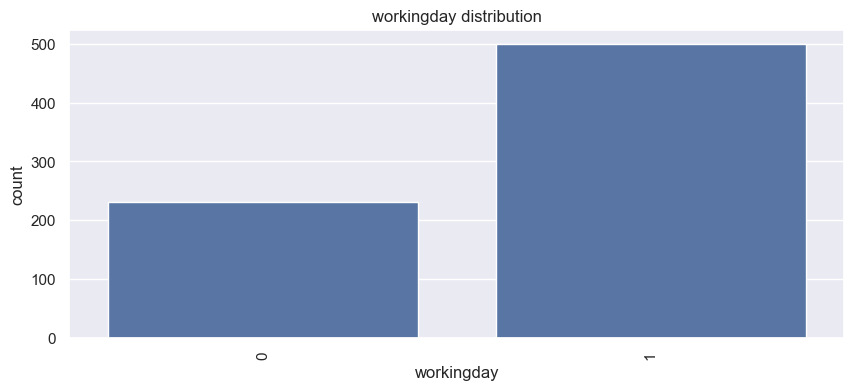

In [38]:
univariate_cat('workingday',day)

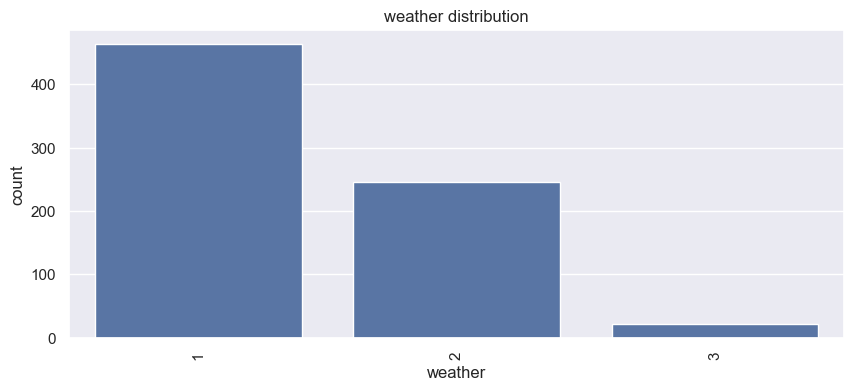

In [39]:
univariate_cat('weather',day)

#### 5C Bivariate Analysis: Numeric Variables

In [40]:
# Numerical variable vs. target variable

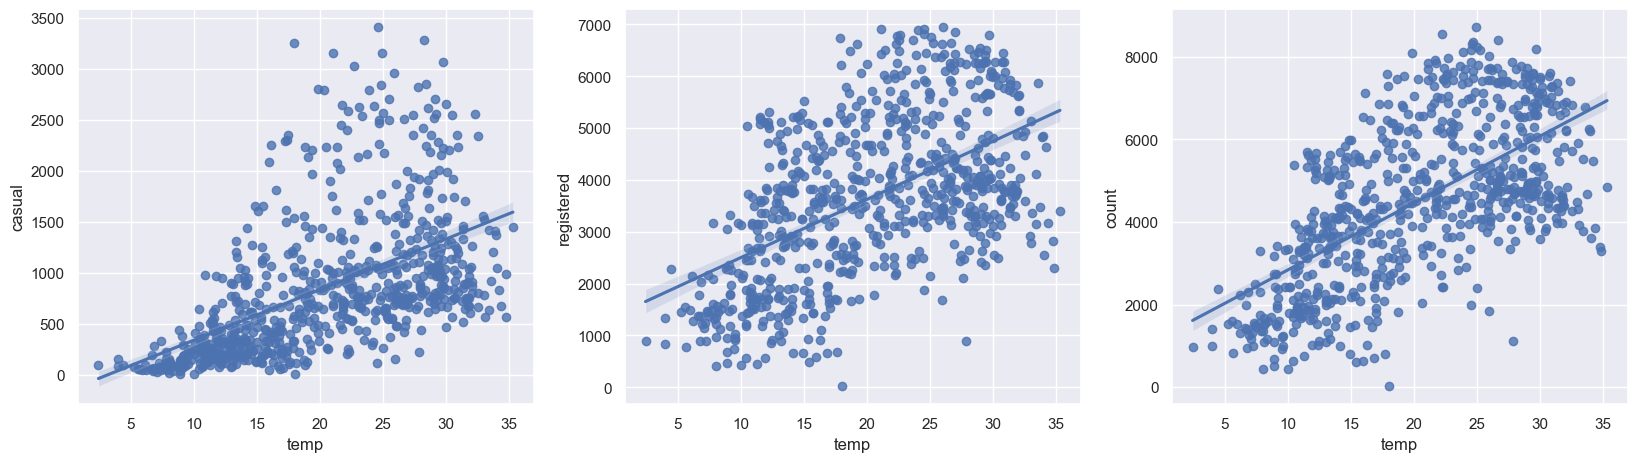

In [41]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.regplot(ax=ax1, x = "temp", y="casual",data=day)
sns.regplot(ax=ax2, x = "temp", y="registered",data=day)
sns.regplot(ax=ax3, x = "temp", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

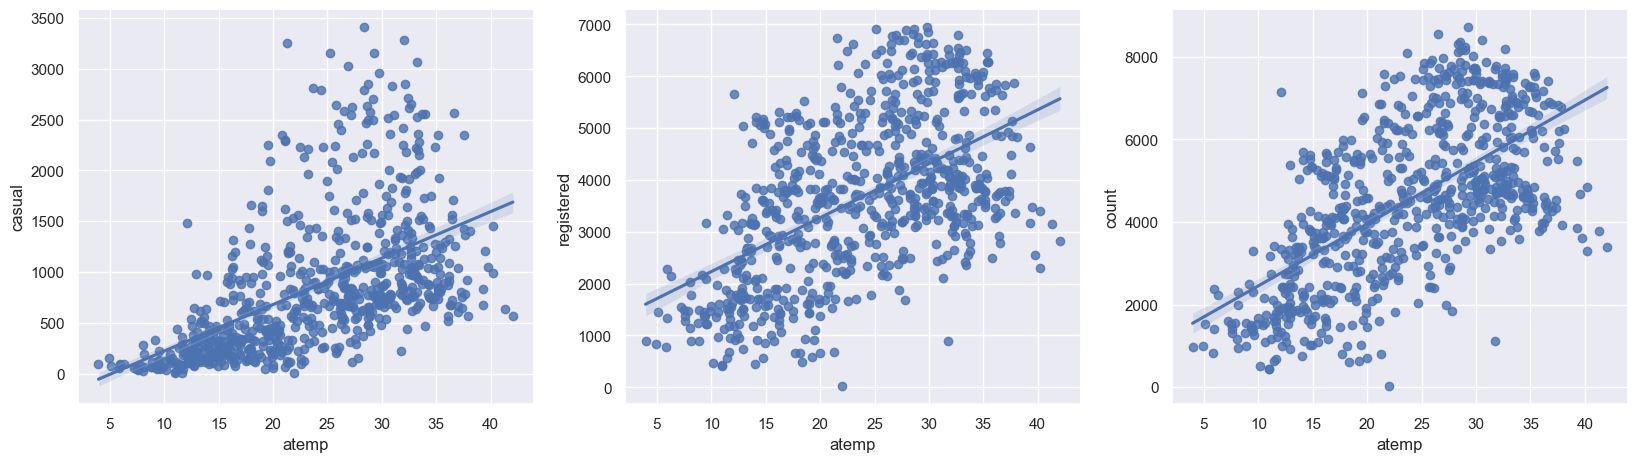

In [42]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.regplot(ax=ax1, x = "atemp", y="casual",data=day)
sns.regplot(ax=ax2, x = "atemp", y="registered",data=day)
sns.regplot(ax=ax3, x = "atemp", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

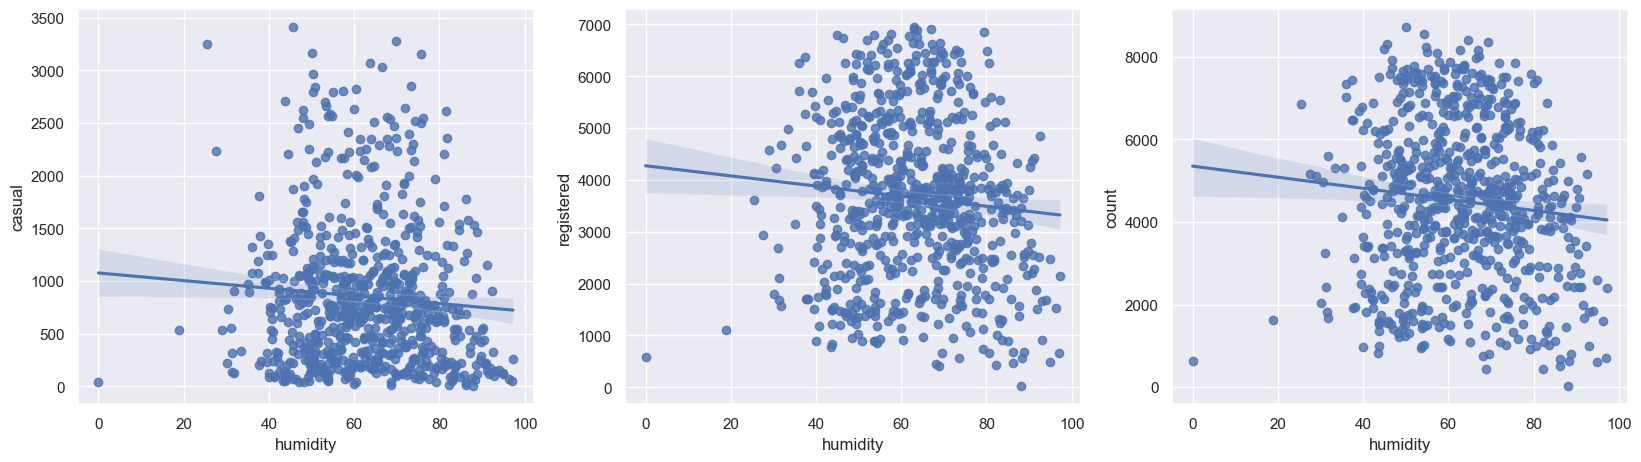

In [43]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.regplot(ax=ax1, x = "humidity", y="casual",data=day)
sns.regplot(ax=ax2, x = "humidity", y="registered",data=day)
sns.regplot(ax=ax3, x = "humidity", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

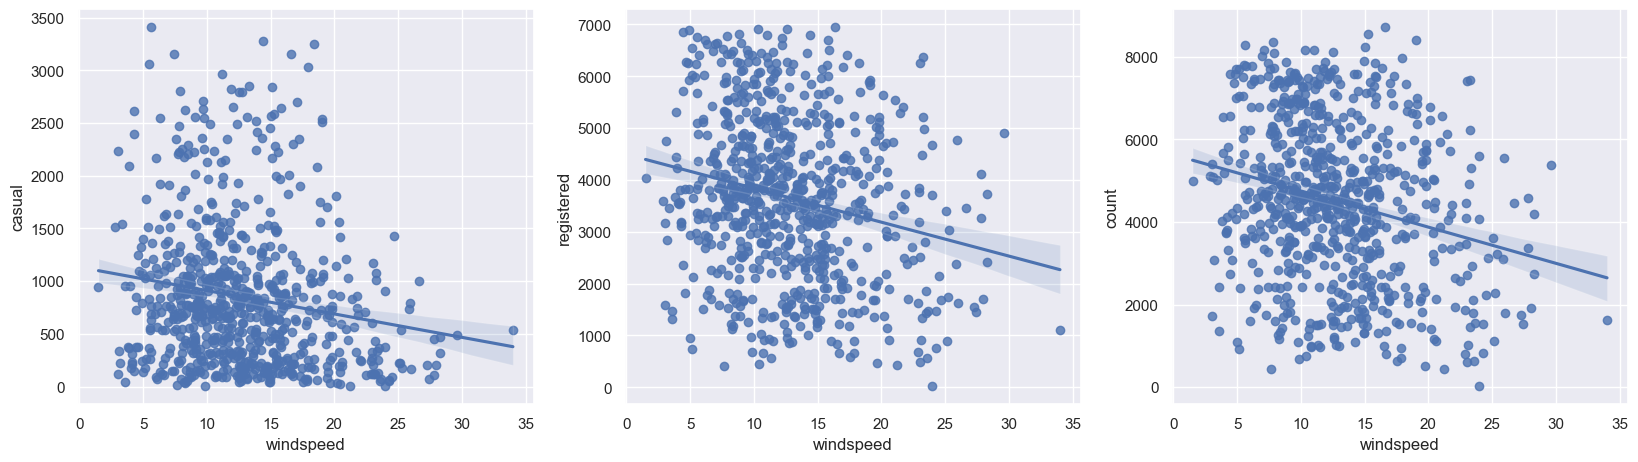

In [44]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.regplot(ax=ax1, x = "windspeed", y="casual",data=day)
sns.regplot(ax=ax2, x = "windspeed", y="registered",data=day)
sns.regplot(ax=ax3, x = "windspeed", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

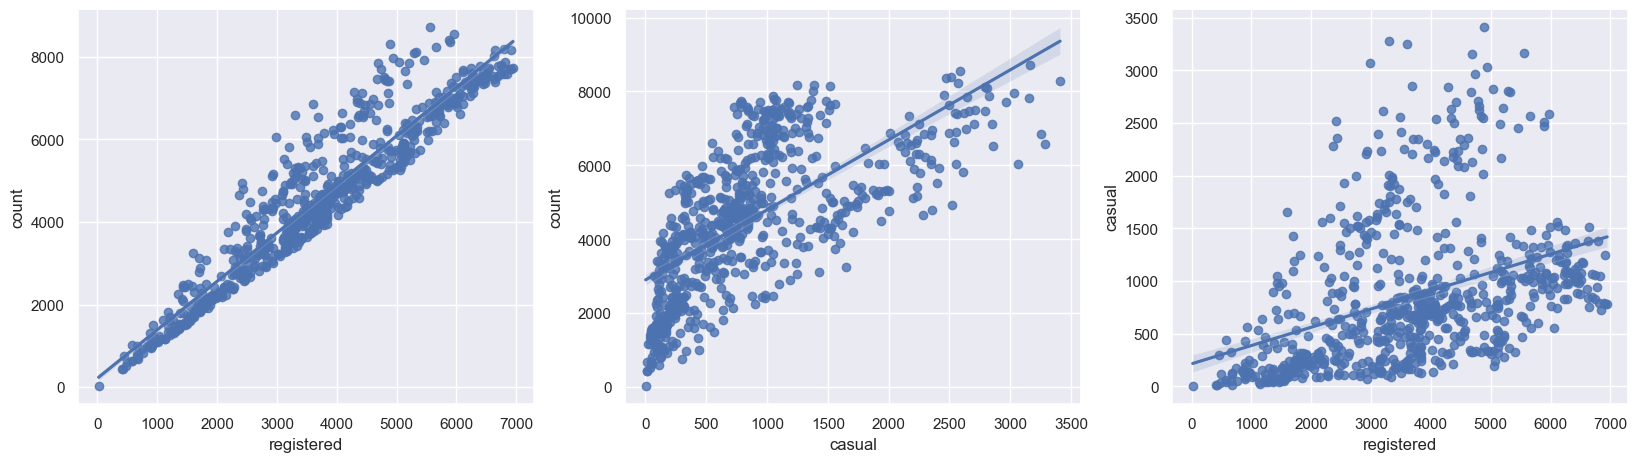

In [45]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.regplot(ax=ax1, x = "registered", y="count",data=day)
sns.regplot(ax=ax2, x = "casual", y="count",data=day)
sns.regplot(ax=ax3, x = "registered", y="casual",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

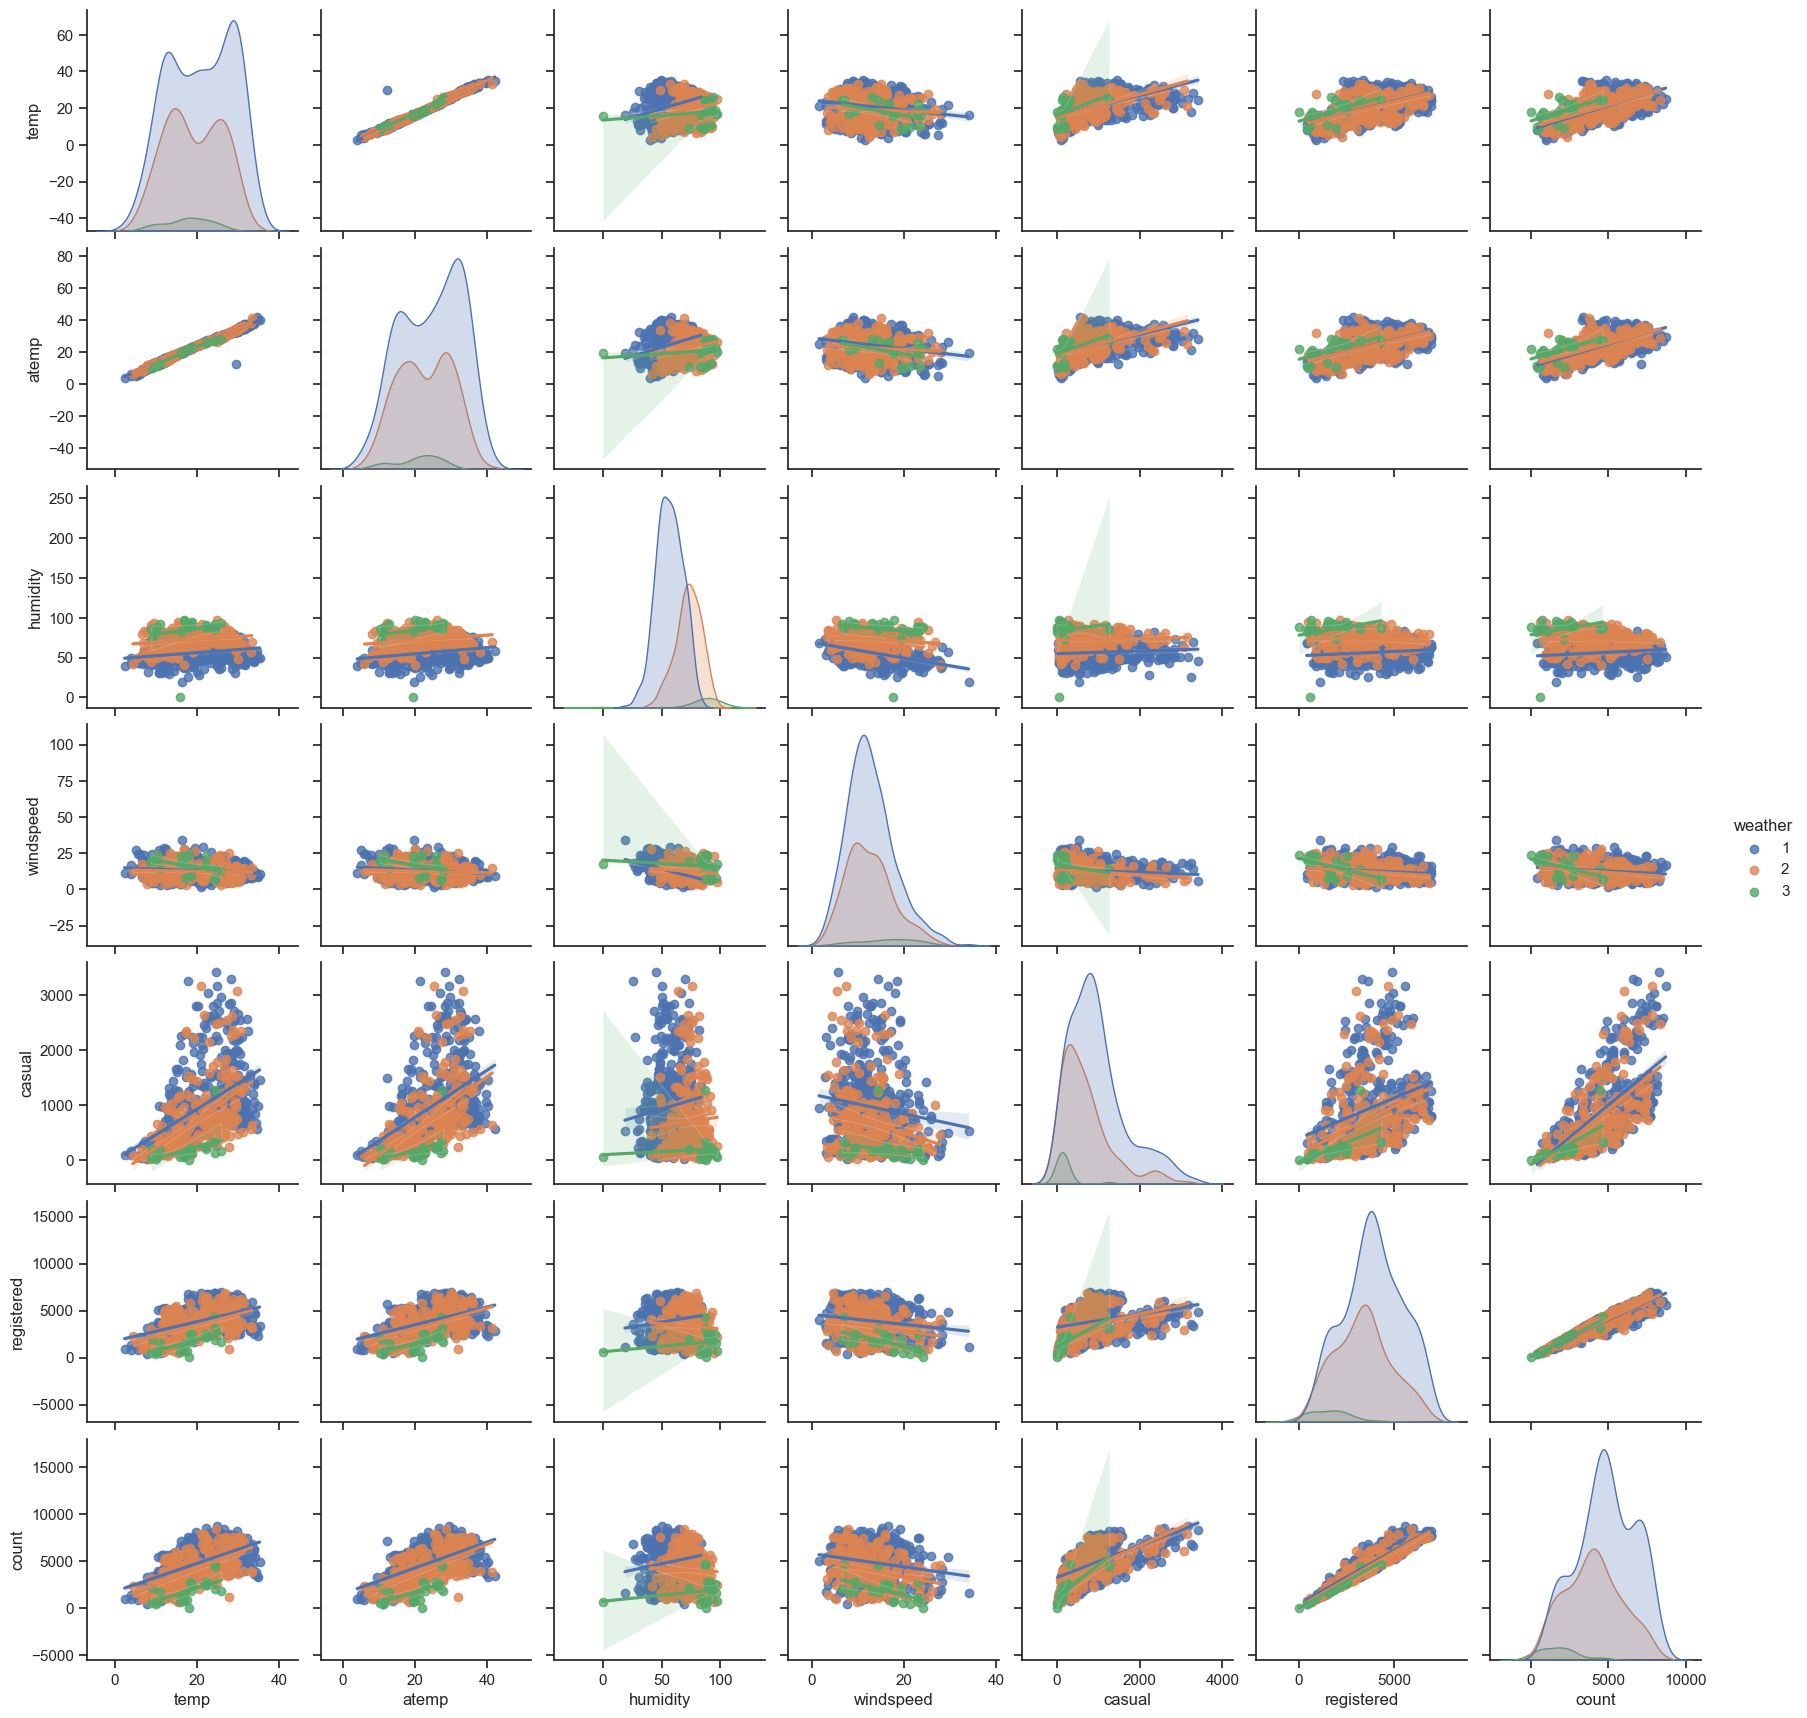

In [46]:
# Pairplots to view the numeric variable relationships
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=day,kind='reg', hue="weather")
plt.show()

#### 5D Correlation Heatmap

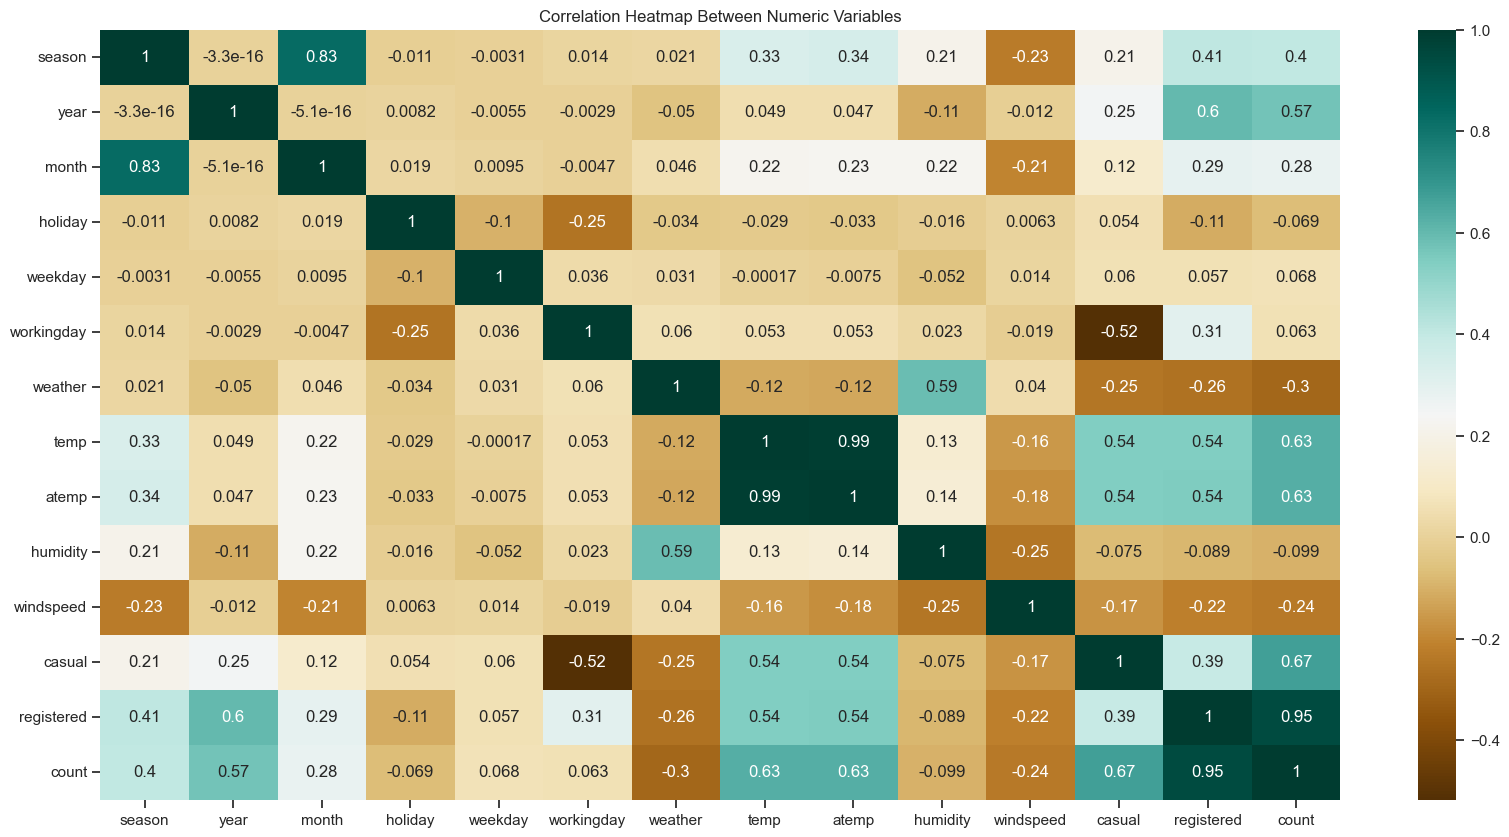

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(day.corr(),annot=True,cmap='BrBG').set(title='Correlation Heatmap Between Numeric Variables');


#### 5E Bivariate Analysis: Categorical Variables

In [48]:
# Categorical variable vs. target variable

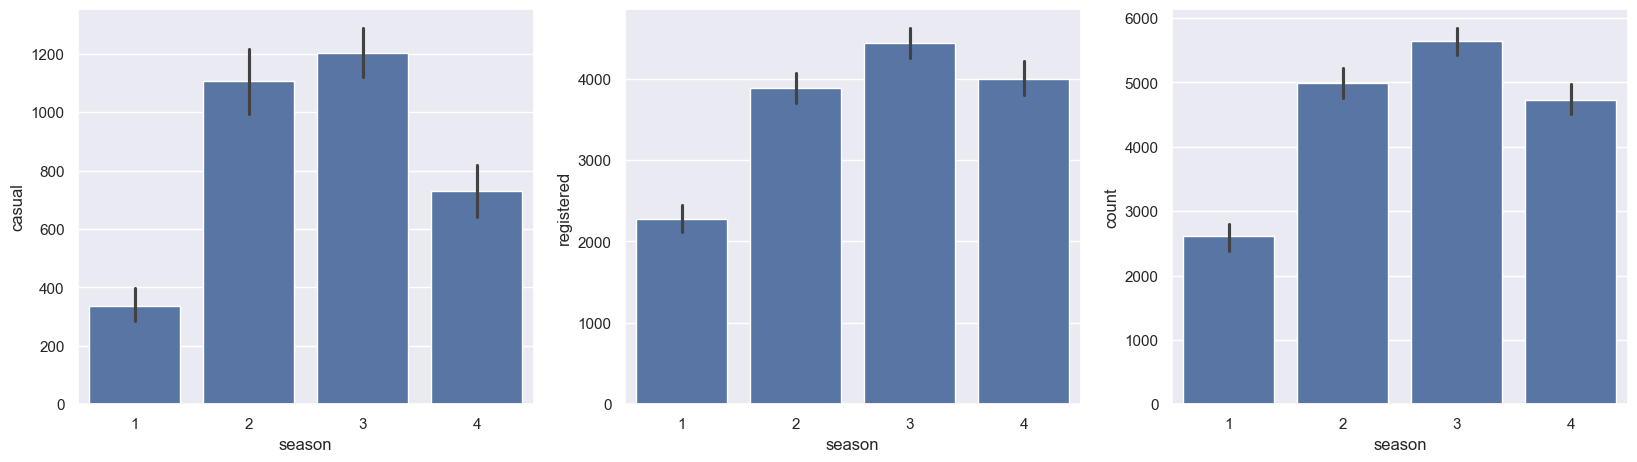

In [49]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "season", y="casual",data=day)
sns.barplot(ax=ax2, x = "season", y="registered",data=day)
sns.barplot(ax=ax3, x = "season", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

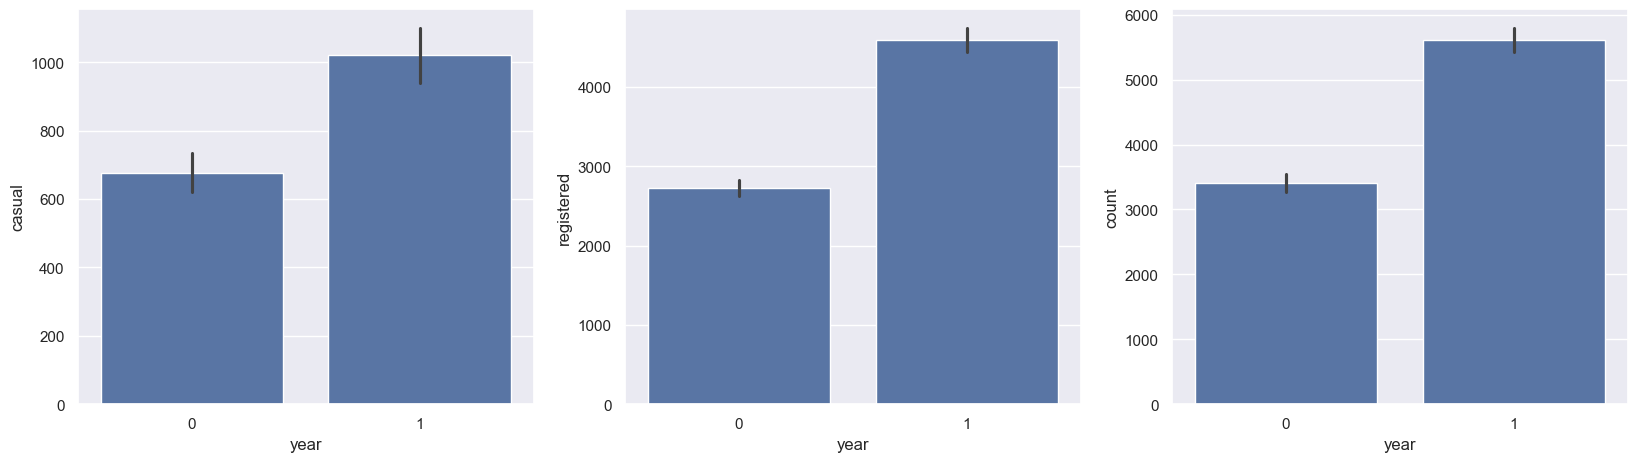

In [50]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "year", y="casual",data=day)
sns.barplot(ax=ax2, x = "year", y="registered",data=day)
sns.barplot(ax=ax3, x = "year", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

In [51]:
day.groupby('weather')['count'].sum()


weather
1    2257952
2     995024
3      37869
Name: count, dtype: int64

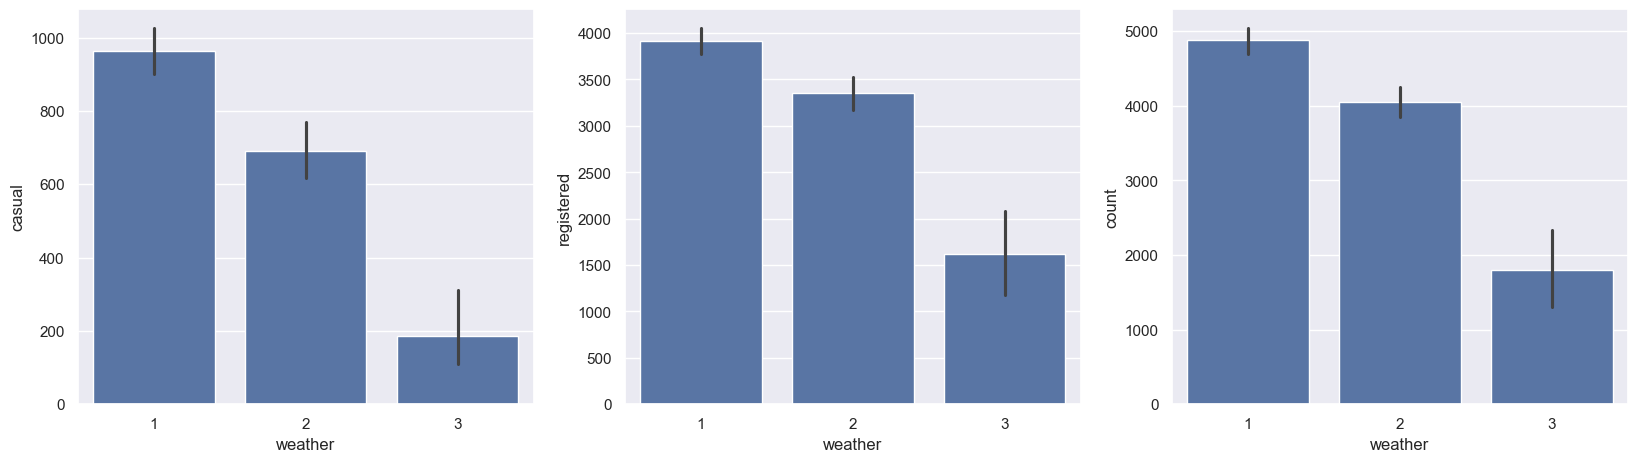

In [52]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "weather", y="casual",data=day)
sns.barplot(ax=ax2, x = "weather", y="registered",data=day)
sns.barplot(ax=ax3, x = "weather", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

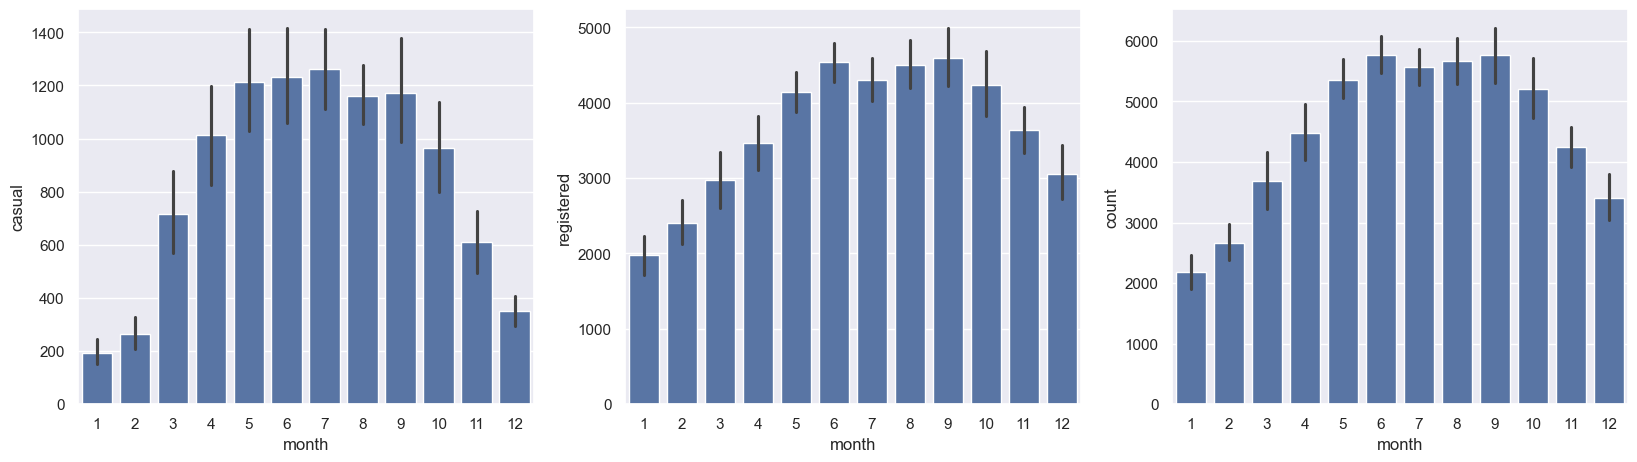

In [54]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "month", y="casual",data=day)
sns.barplot(ax=ax2, x = "month", y="registered",data=day)
sns.barplot(ax=ax3, x = "month", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

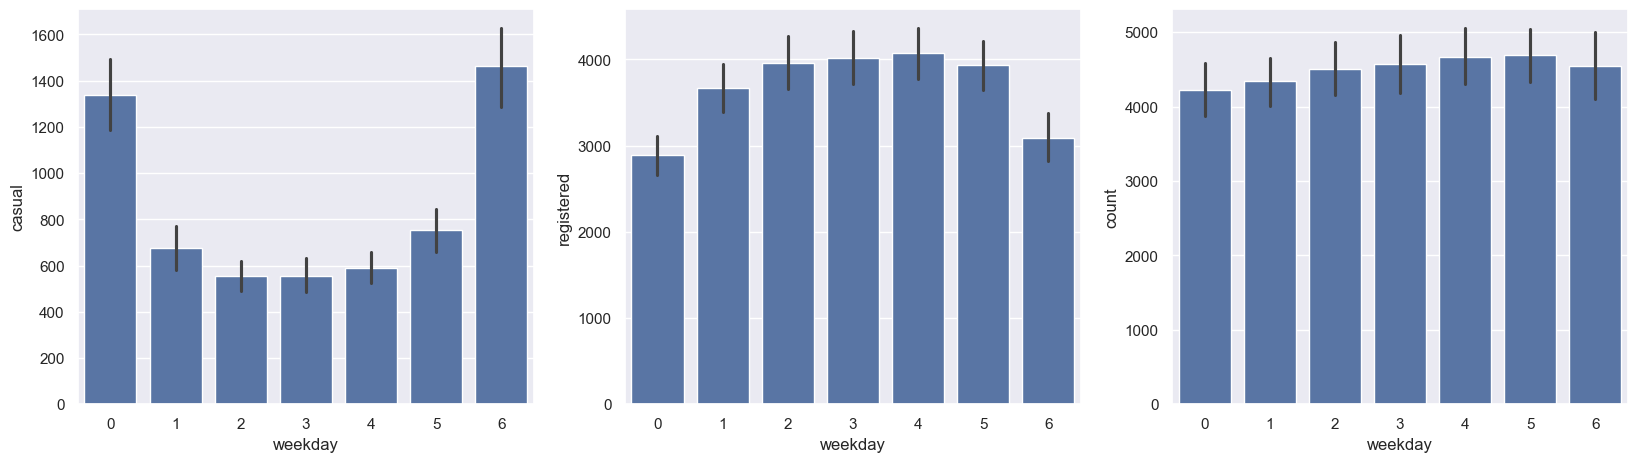

In [55]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "weekday", y="casual",data=day)
sns.barplot(ax=ax2, x = "weekday", y="registered",data=day)
sns.barplot(ax=ax3, x = "weekday", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

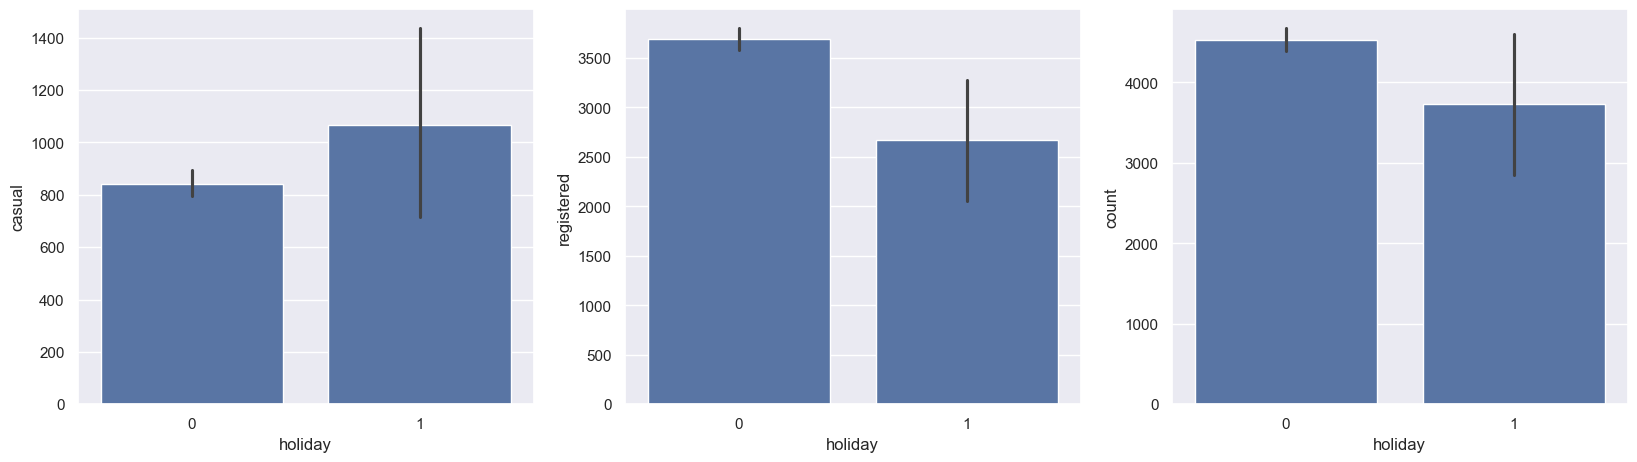

In [56]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "holiday", y="casual",data=day)
sns.barplot(ax=ax2, x = "holiday", y="registered",data=day)
sns.barplot(ax=ax3, x = "holiday", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

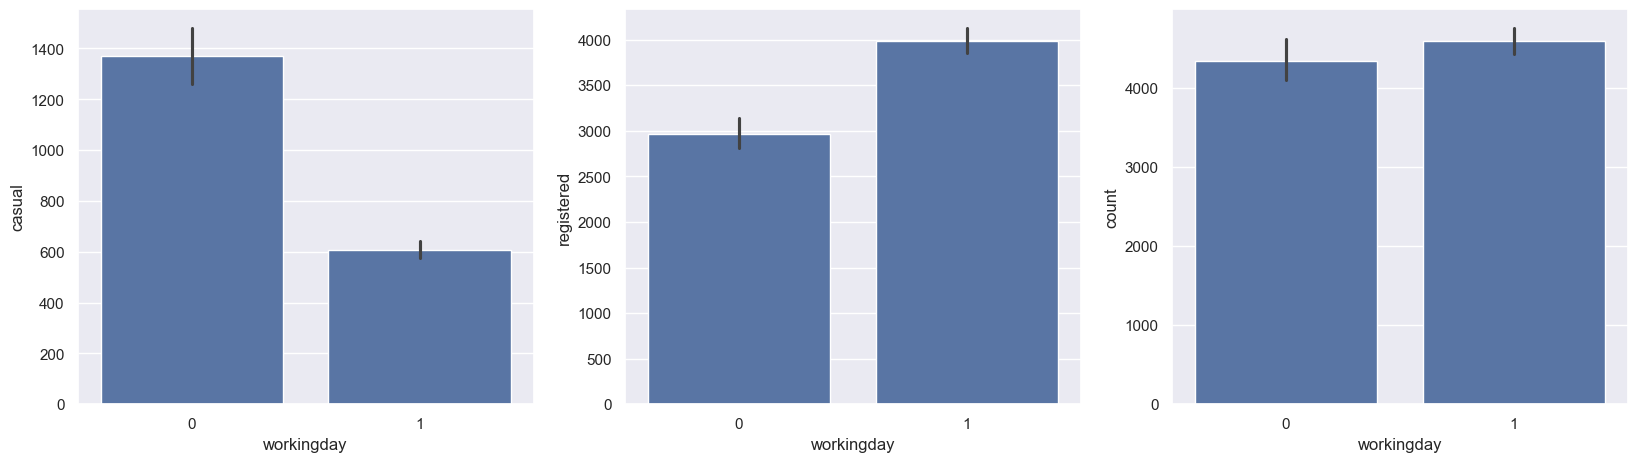

In [57]:
sns.set(font_scale=1)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))        
sns.set_color_codes("pastel")
sns.set_style("whitegrid")
sns.barplot(ax=ax1, x = "workingday", y="casual",data=day)
sns.barplot(ax=ax2, x = "workingday", y="registered",data=day)
sns.barplot(ax=ax3, x = "workingday", y="count",data=day)
plt.tick_params(axis='both', which='major')
plt.subplots_adjust(wspace=0.2, top=0.9)
plt.show();

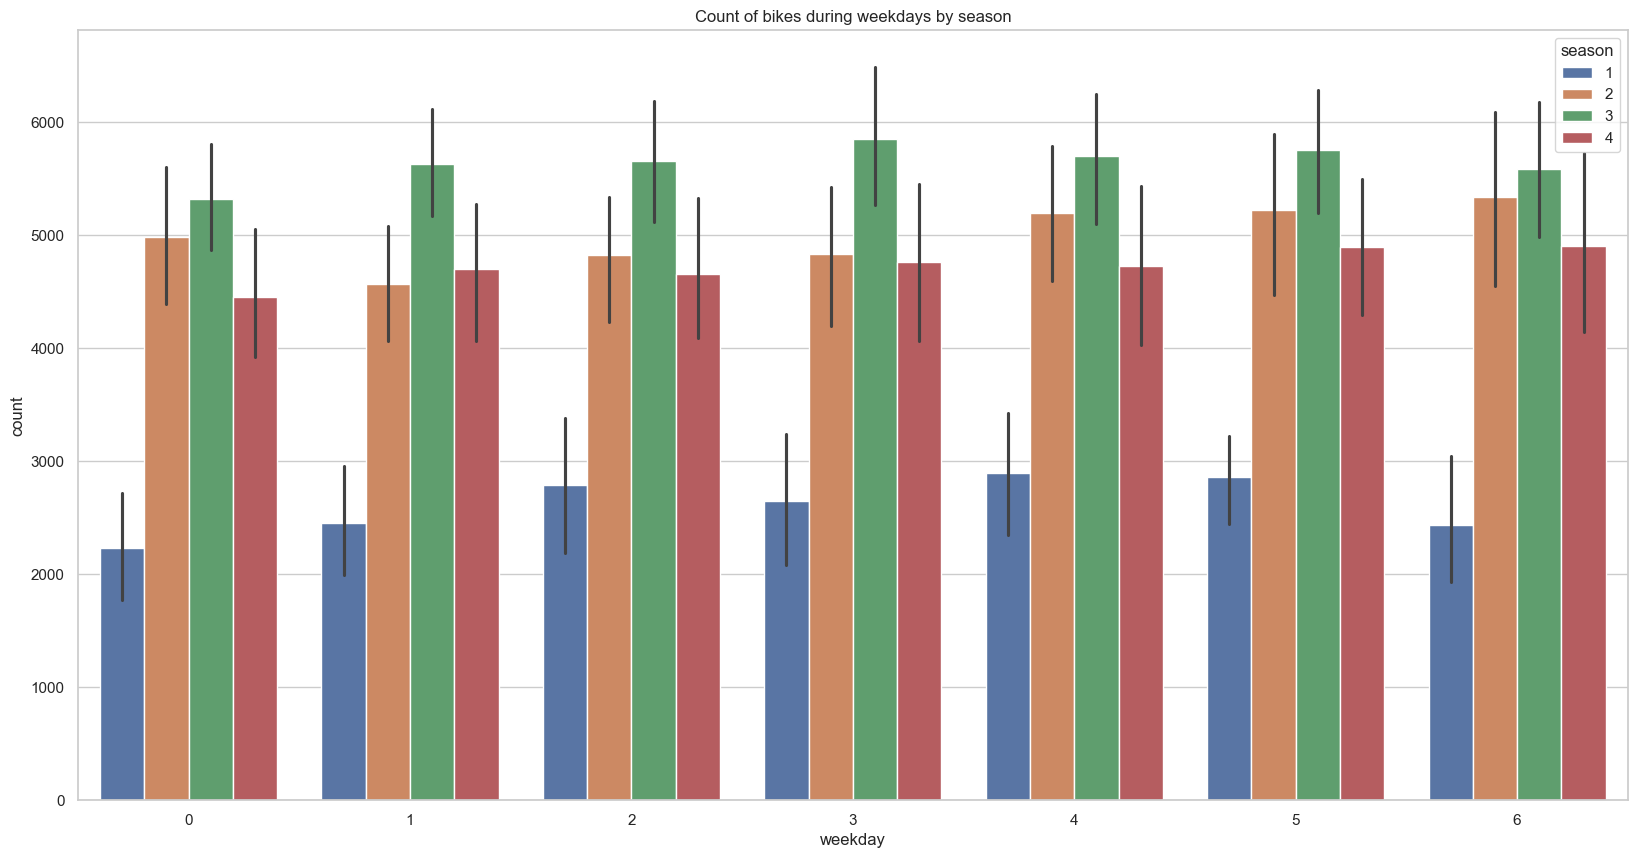

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=day, x='weekday', y='count', hue='season', ax=ax);
ax.set(title='Count of bikes during weekdays by season');

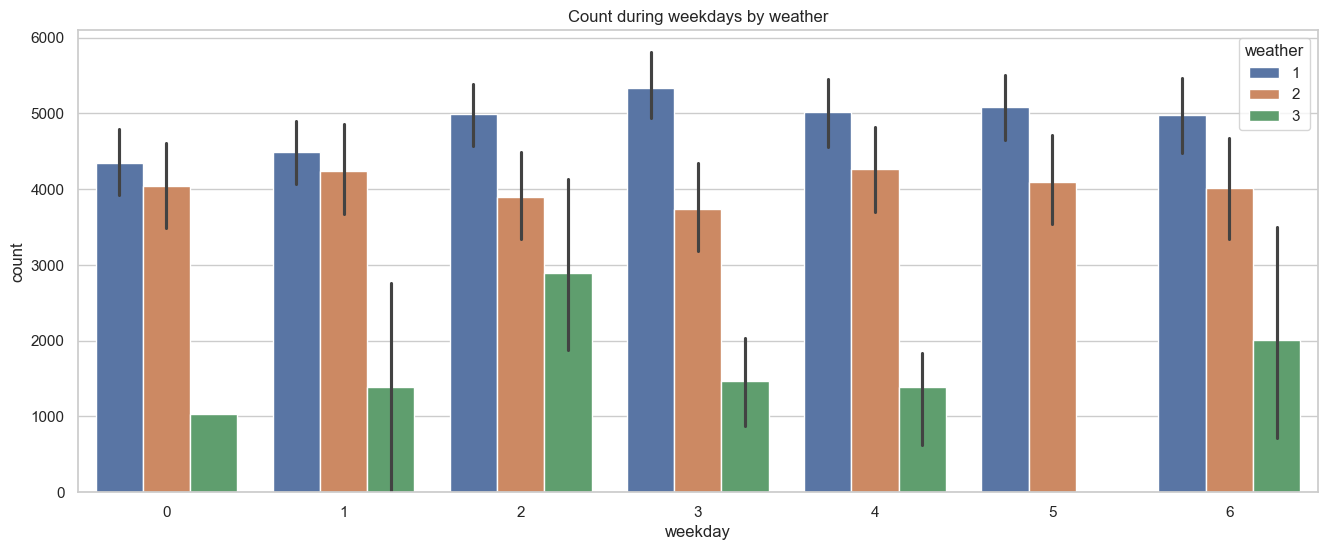

In [59]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='count', hue='weather', ax=ax);
ax.set(title='Count during weekdays by weather');

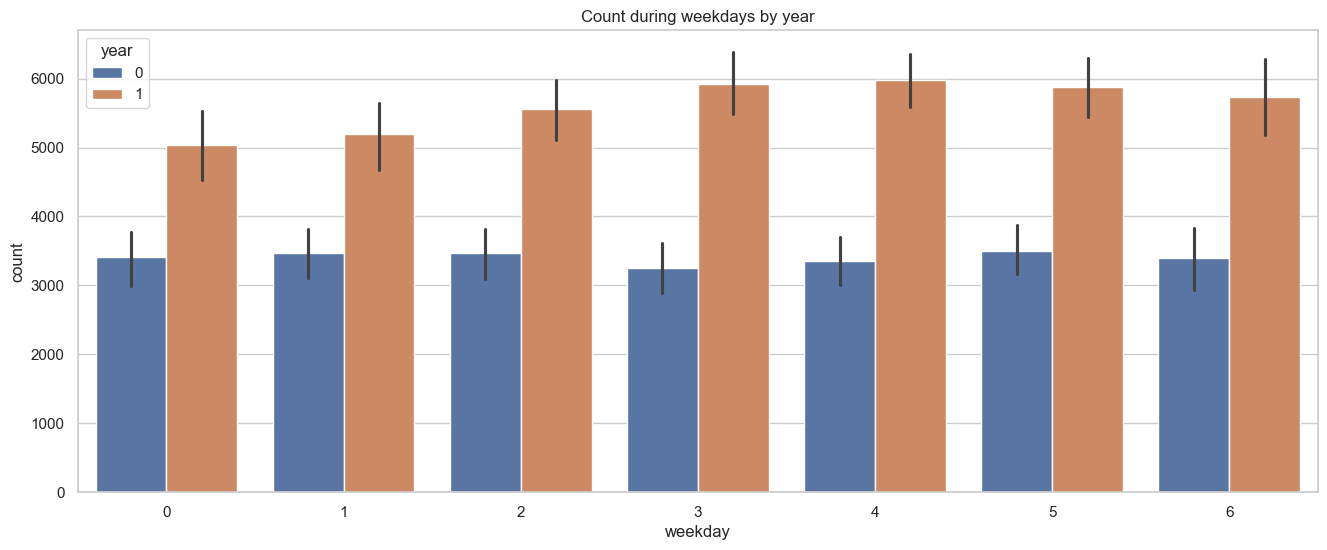

In [60]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='count', hue='year', ax=ax);
ax.set(title='Count during weekdays by year');

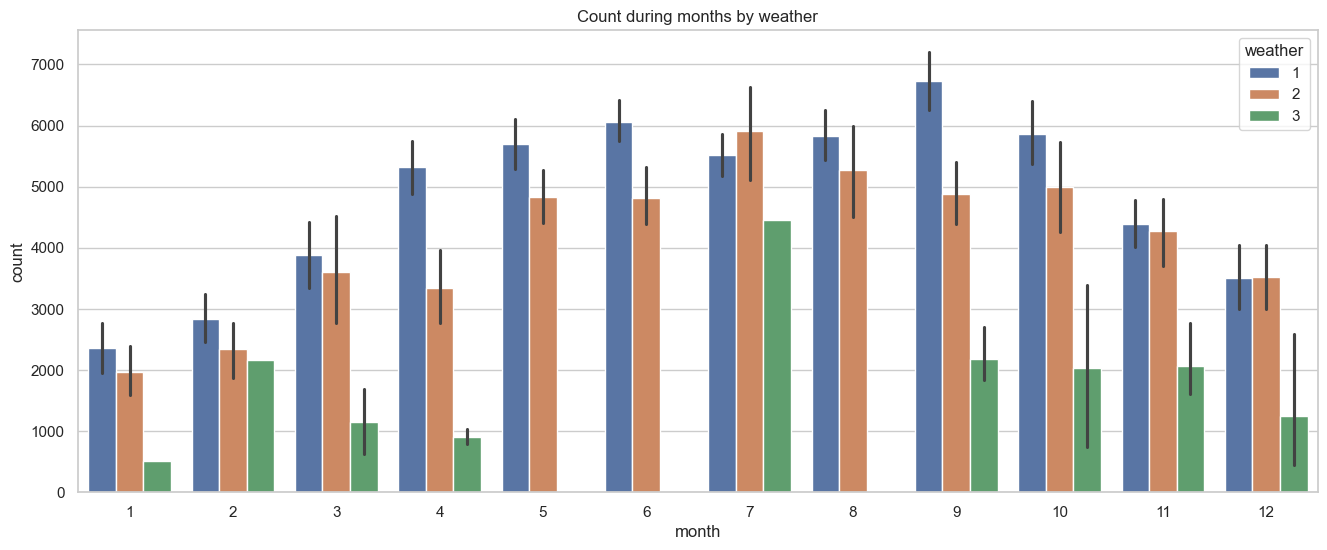

In [61]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='month', y='count', hue='weather', ax=ax);
ax.set(title='Count during months by weather');

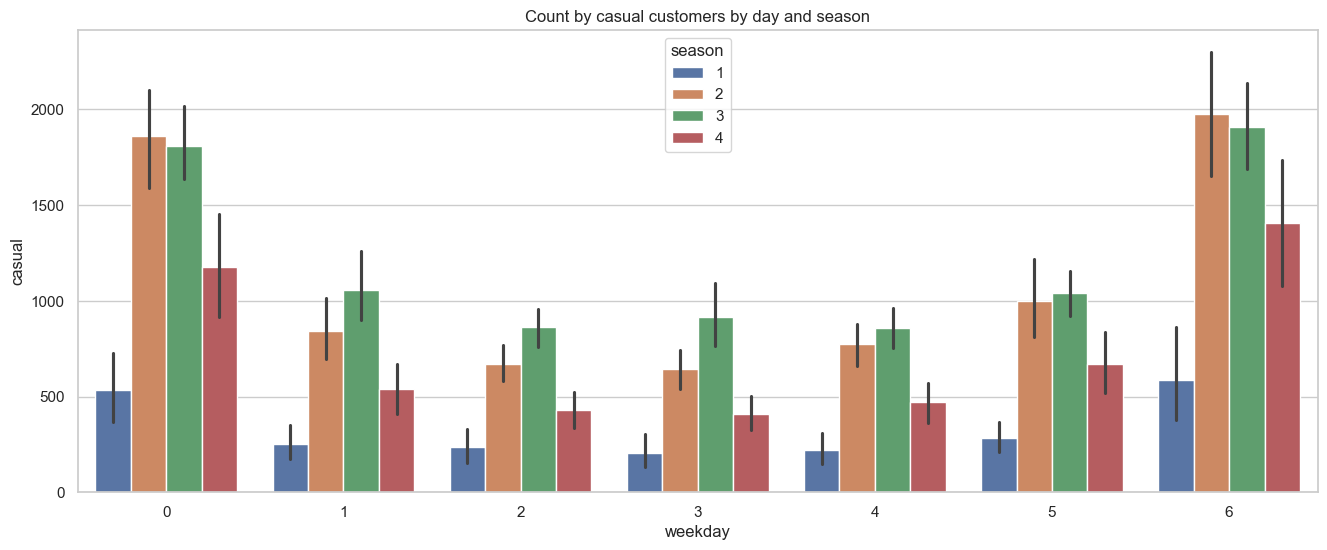

In [62]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='casual', hue='season', ax=ax);
ax.set(title='Count by casual customers by day and season');

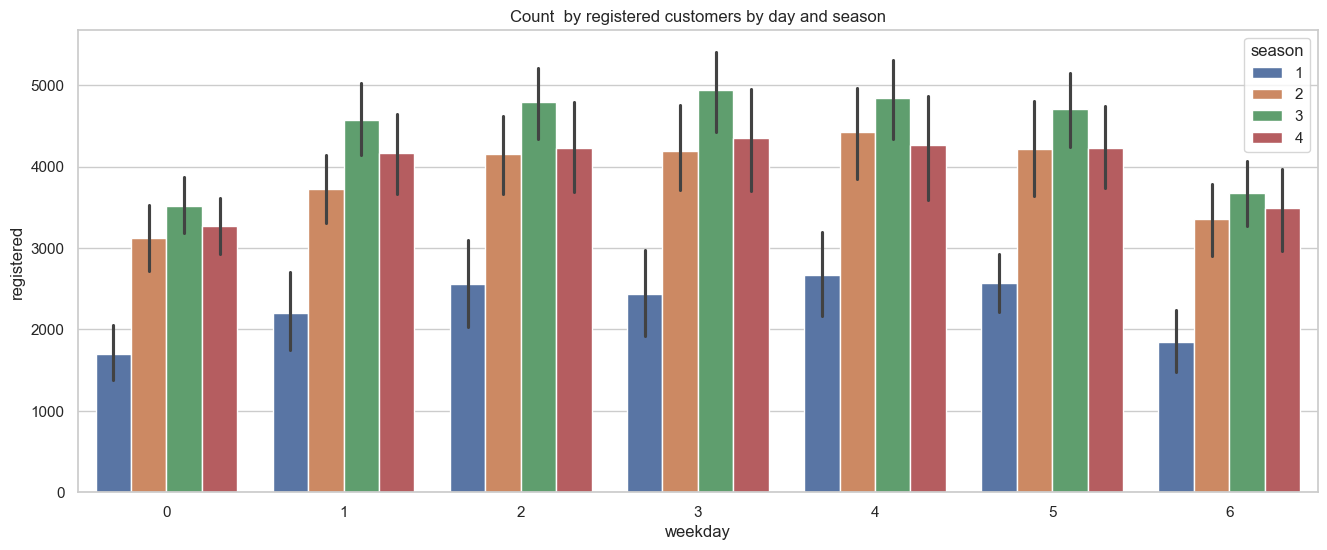

In [63]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='registered', hue='season', ax=ax);
ax.set(title='Count  by registered customers by day and season');

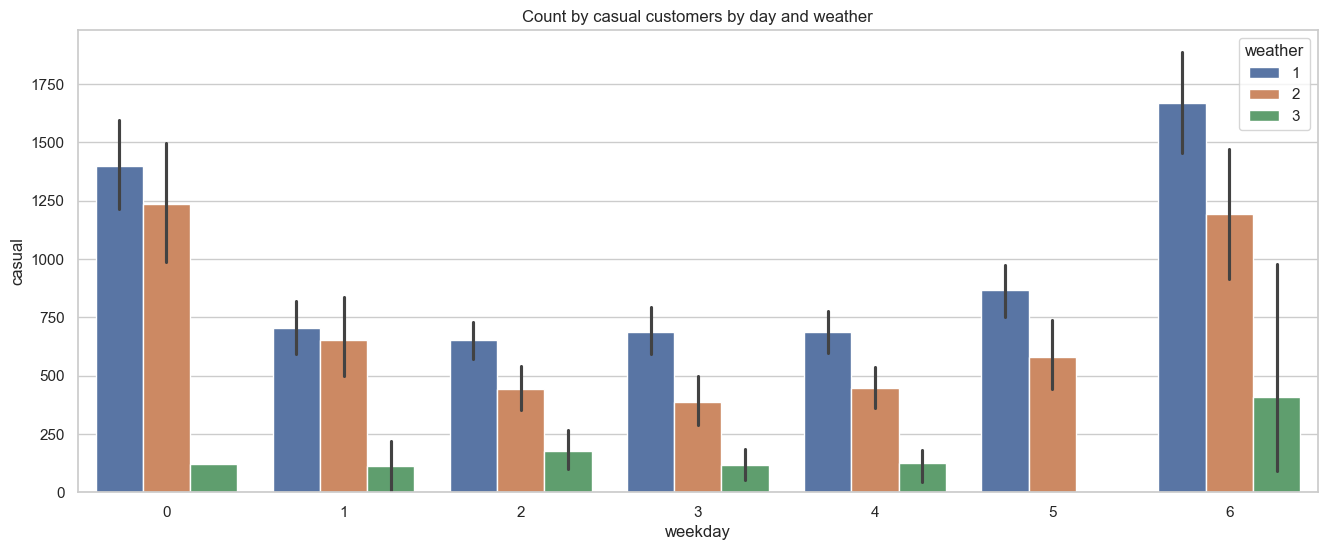

In [64]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='casual', hue='weather', ax=ax);
ax.set(title='Count by casual customers by day and weather');

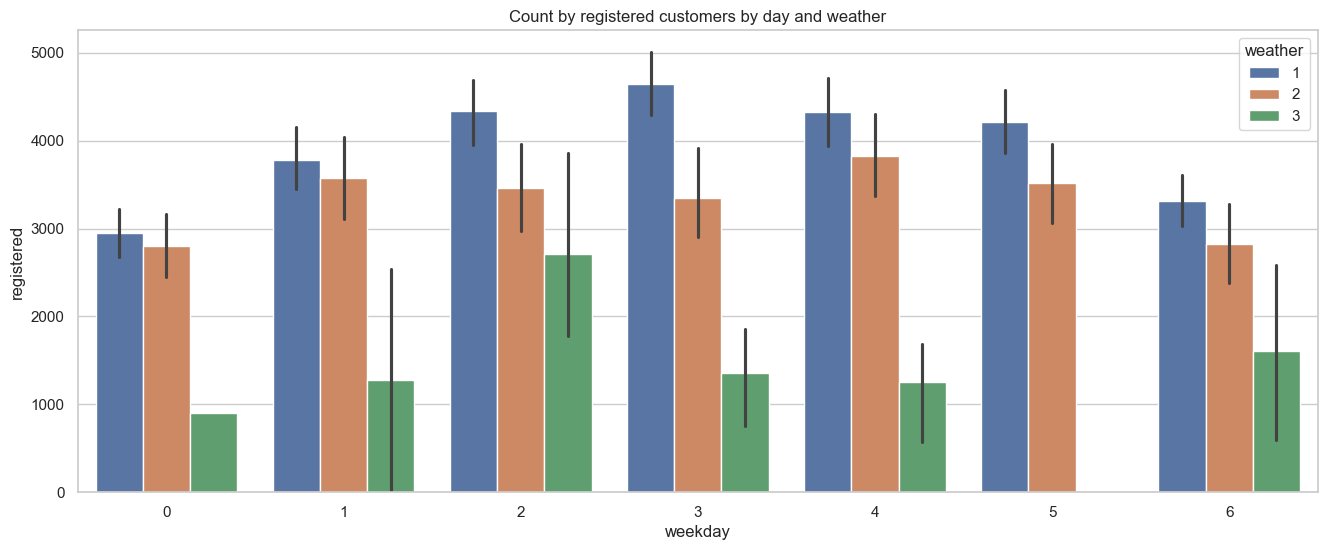

In [65]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=day, x='weekday', y='registered', hue='weather', ax=ax);
ax.set(title='Count by registered customers by day and weather');

### 6. Data Preparation


#### 6A One Hot Encoding

In [23]:
# Create a function to define one hot encoded variables
dayohec = day

def ohec(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','year','holiday','weekday','workingday','weather']

for col in cols:
    dayohec = ohec(dayohec, col)
dayohec.head()


temp     atemp  humidity  windspeed  casual  registered  count  \
0  14.110847  18.18125   80.5833  10.749882     331         654    985   
1  14.902598  17.68695   69.6087  16.652113     131         670    801   
2   8.050924   9.47025   43.7273  16.636703     120        1229   1349   
3   8.200000  10.60610   59.0435  10.739832     108        1454   1562   
4   9.305237  11.46350   43.6957  12.522300      82        1518   1600   

   season_2  season_3  season_4  ...  holiday_1  weekday_1  weekday_2  \
0     False     False     False  ...      False      False      False   
1     False     False     False  ...      False      False      False   
2     False     False     False  ...      False       True      False   
3     False     False     False  ...      False      False       True   
4     False     False     False  ...      False      False      False   

   weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weather_2  \
0      False      False      False       True         False       True   
1      False      False      False      False         False       True   
2      False      False      False      False          True      False   
3      False      False      False      False          True      False   
4       True      False      False      False          True      False   

   weather_3  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 32 columns]

In [24]:
# Dropping components which are a part of the target variable or in case of atemp, which is similar to temp.
dayohec.drop(['casual','registered','atemp'],axis=1, inplace=True)

#### 6B Splitting the Data into Train & Test

In [25]:
#importing libraries from sklearn
from sklearn.model_selection import train_test_split


In [26]:
df_train, df_test = train_test_split(dayohec, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 6C Scaling the Dataset

In [27]:
#importing libraries from sklearn
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
pd.set_option('display.max_columns', None)
df_train.describe()

temp    humidity   windspeed        count
count  510.000000  510.000000  510.000000   510.000000
mean     0.537262    0.650369    0.320768  4486.382353
std      0.225844    0.145882    0.169797  1952.158739
min      0.000000    0.000000    0.000000    22.000000
25%      0.339853    0.538643    0.199179  3120.000000
50%      0.540519    0.653714    0.296763  4530.000000
75%      0.735215    0.754830    0.414447  5973.500000
max      1.000000    1.000000    1.000000  8714.000000

In [31]:
df_train.head()

temp  humidity  windspeed  count  season_2  season_3  season_4  \
653  0.509887  0.575354   0.300794   7534     False     False      True   
576  0.815169  0.725633   0.264686   7216     False      True     False   
426  0.442393  0.640189   0.255342   4066     False     False     False   
728  0.245101  0.498067   0.663106   1796     False     False     False   
482  0.395666  0.504508   0.188475   4220      True     False     False   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
653    False    False    False    False    False    False    False    False   
576    False    False    False    False    False     True    False    False   
426    False     True    False    False    False    False    False    False   
728    False    False    False    False    False    False    False    False   
482    False    False     True    False    False    False    False    False   

     month_10  month_11  month_12  year_1  holiday_1  weekday_1  weekday_2  \
653      True     False     False    True      False      False       True   
576     False     False     False    True      False      False       True   
426     False     False     False    True      False      False      False   
728     False     False      True    True      False      False      False   
482     False     False     False    True      False      False      False   

     weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weather_2  \
653      False      False      False      False          True      False   
576      False      False      False      False          True      False   
426      False      False      False       True         False       True   
728      False      False      False      False         False      False   
482      False      False      False       True         False       True   

     weather_3  
653      False  
576      False  
426      False  
728      False  
482      False

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [33]:
### Dividing into X and Y sets for the model building

y_train = df_train.pop('count')
X_train = df_train

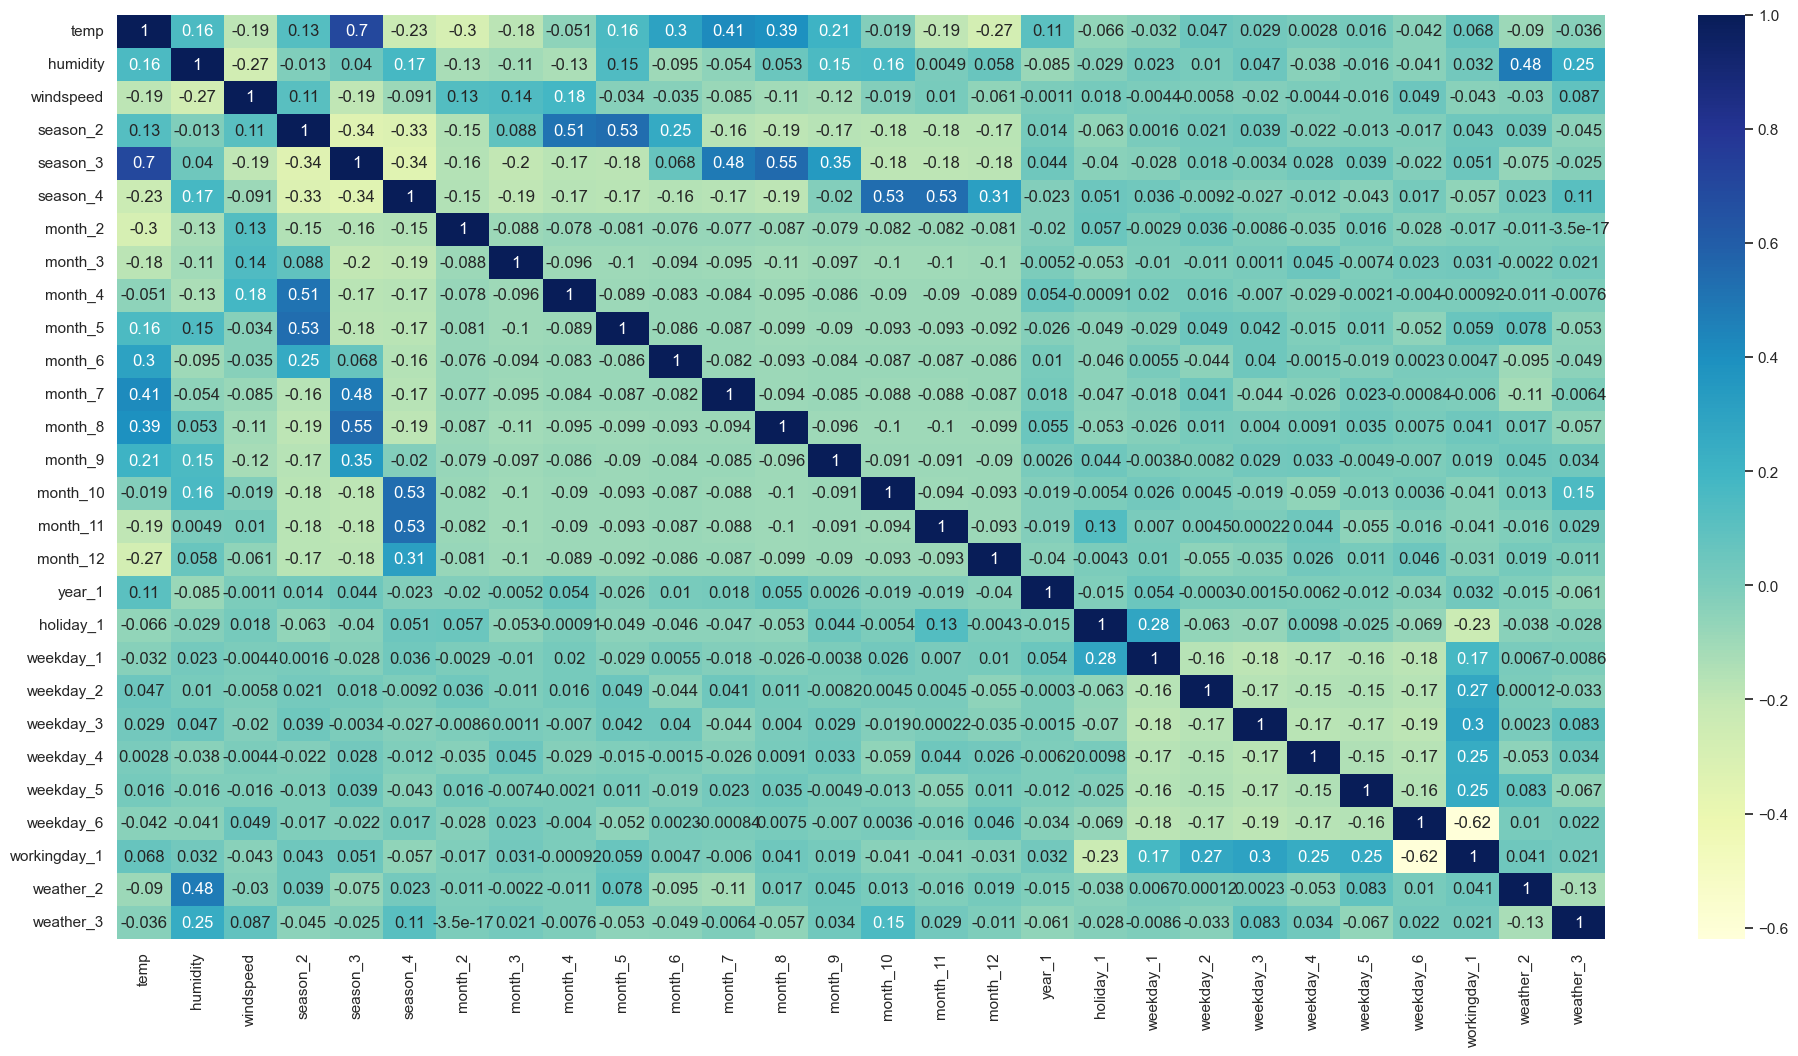

In [34]:
# Review correlation coefficients to know which variables are correlated
sns.set(font_scale=1)
plt.figure(figsize = (24, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 7. Model Building


In [35]:
#Importing statsmodels
import statsmodels.api as sm

In [36]:
# Add a constant to X_train
X_train_lm = sm.add_constant(X_train)

X_train_lm = X_train_lm.apply(pd.to_numeric, errors='coerce')
X_train_lm = X_train_lm.astype(int)


# Create an initial fitted model
lr = sm.OLS(y_train,X_train_lm).fit()

In [37]:
# Summary of the linear regression model 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     82.39
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.14e-157
Time:                        06:22:55   Log-Likelihood:                -4164.1
No. Observations:                 510   AIC:                             8380.
Df Residuals:                     484   BIC:                             8490.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1044.9384    169.855      6.152   

#### 7A Checking VIF

In [38]:
# Importing Variance Inflation Factor to check how independent variables are correlated with each other. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.astype(int)
print(X_train.dtypes.value_counts())  # Count of each data type
print(X_train.dtypes)  



int64    28
Name: count, dtype: int64
temp            int64
humidity        int64
windspeed       int64
season_2        int64
season_3        int64
season_4        int64
month_2         int64
month_3         int64
month_4         int64
month_5         int64
month_6         int64
month_7         int64
month_8         int64
month_9         int64
month_10        int64
month_11        int64
month_12        int64
year_1          int64
holiday_1       int64
weekday_1       int64
weekday_2       int64
weekday_3       int64
weekday_4       int64
weekday_5       int64
weekday_6       int64
workingday_1    int64
weather_2       int64
weather_3       int64
dtype: object


In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25  workingday_1    inf
23     weekday_5    inf
22     weekday_4    inf
21     weekday_3    inf
20     weekday_2    inf
19     weekday_1    inf
18     holiday_1    inf
4       season_3  15.07
5       season_4  10.72
3       season_2   8.84
12       month_8   6.95
11       month_7   5.66
15      month_11   5.08
13       month_9   5.01
14      month_10   5.01
9        month_5   4.37
8        month_4   4.14
10       month_6   3.81
16      month_12   3.10
17        year_1   1.97
7        month_3   1.91
24     weekday_6   1.71
26     weather_2   1.57
6        month_2   1.31
27     weather_3   1.11
2      windspeed   1.05
0           temp    NaN
1       humidity    NaN

# Observations
Since Temp and Atemp as similar, we will drop temp and run the model again.
Similarly, since registered users and casual users are components of total count, we will drop both values

#### 7B Regression Assumptions

Text(0.5, 0, 'Errors')

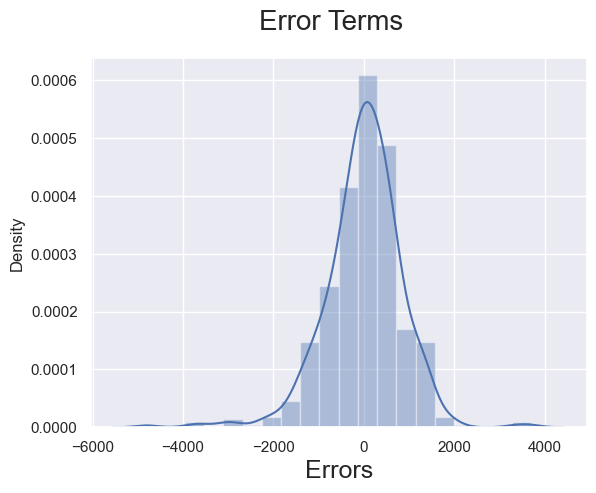

In [41]:
# Residual analysis on the training data
y_train_pred = lr.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Residual')

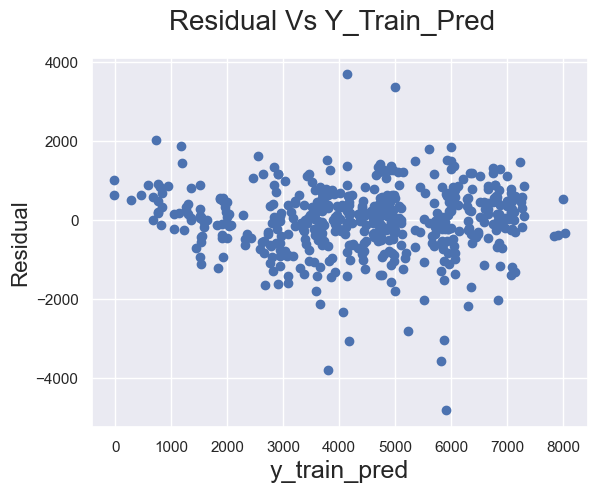

In [42]:
##Let us also verify if the residuals are independent
fig = plt.figure()
plt.scatter(y_train_pred, y_train-y_train_pred)
fig.suptitle('Residual Vs Y_Train_Pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize = 18)                          # X-label
plt.ylabel('Residual', fontsize = 16)

Text(0, 0.5, 'y_test_pred')

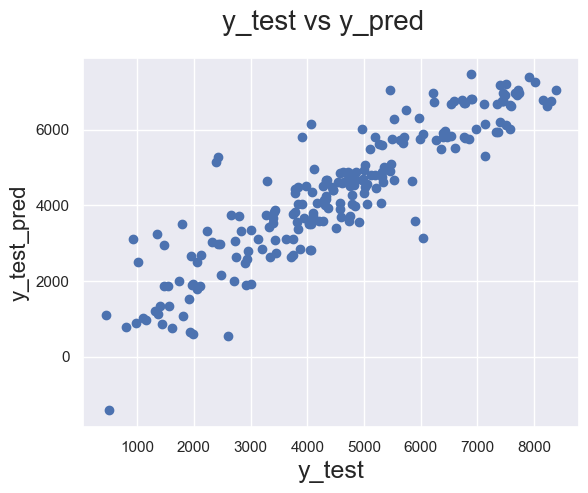

In [43]:
##Dividing into X_test and y_test

y_test = df_test.pop('count')

X_test = df_test

## Adding constant variable to test dataframe and predict the dependent variable on the test data
X_test_lm = sm.add_constant(X_test)
y_test_pred=lr.predict(X_test_lm)

## Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [44]:
#Calculate the R^2 
from sklearn.metrics import r2_score
r_squared_test_m1 = r2_score(y_test, y_test_pred)
r_squared_test_m1

0.8023850905338695

In [45]:
##Model_details table
column_names=['ModelNo','DF#','R2','AdjR2','F-Prob','Pvalue>0.05','VIF>=5','Res_Mean_zero','test_R2','Modelspec']
Model_details = pd.DataFrame(columns = column_names)

In [46]:
# column_names=['ModelNo','DF#','R2','AdjR2','F-Prob','Pvalue>0.05','VIF>=5','Res_Mean_zero','test_R2','Modelspec']
# Model_details = pd.concat(pd.Series([1, 27, 0.853,0.845,8.74,14,20,'closely',0.827,'Allvar'], index=Model_details.columns ), ignore_index=True)

In [47]:
selected_rfe = ['temp','humidity','windspeed','season_2','season_3','season_4','month_10','month_9','month_8','year_1','weekday_6','workingday_1','holiday_1','weather_2','weather_3']

In [48]:
# Dropping 'season_3' variable due to P value >.05 and humidity for VIF greater than 5, considering temperature is more correlated than humidity.
selected_rfe_m3 = ['temp',
 'windspeed',
 'season_2',
 'season_4',
 'month_10',
 'month_9',
 'month_8',
 'year_1',
 'weekday_6',
 'workingday_1',
 'holiday_1',
 'weather_2',
 'weather_3']

### 8. Model Evaluation

In [49]:
#Summarized model details
Model_details

Empty DataFrame
Columns: [ModelNo, DF#, R2, AdjR2, F-Prob, Pvalue>0.05, VIF>=5, Res_Mean_zero, test_R2, Modelspec]
Index: []

#### 8A Conclusions

# Conclusions

The formula for predicting the demand of Bike sharing using  RFE-13 Model is Below:
843.67+(temp*4432.07)+(windspeed*-1331.84)
+(season_2*876.35)+(season_4* 1101.25)+
(month_10*322.85)+(month_9*1033.15)+
(month_8* 471.43)+ (year_1 *2024.62)+
(weekday_6*504.24)+(workingday_1*412.46)+
(holiday_1*-472.05)+(weather_2*-741.88)+
(weather_3*-2557.56)

Major drivers impacting demand are:
    
* Scaling demand between years 1 & 2
* Top 3 positively weighted variables are :
    1. Year
    2. temp
    3. winter
* Top 3 negatively weighted variables are :
    1. Weather: Light Snow, Light Rain
    2. Windspeed
    3. Weather:Mist + Cloudy, Mist 